<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Portfolio-Construction" data-toc-modified-id="Portfolio-Construction-1">Portfolio Construction</a></span></li><li><span><a href="#Bin-Relative" data-toc-modified-id="Bin-Relative-2">Bin Relative</a></span></li><li><span><a href="#Portfolio-Raw" data-toc-modified-id="Portfolio-Raw-3">Portfolio Raw</a></span></li><li><span><a href="#Performance" data-toc-modified-id="Performance-4">Performance</a></span><ul class="toc-item"><li><span><a href="#3-Bins" data-toc-modified-id="3-Bins-4.1">3 Bins</a></span></li><li><span><a href="#5-Bins" data-toc-modified-id="5-Bins-4.2">5 Bins</a></span></li><li><span><a href="#10-Bins" data-toc-modified-id="10-Bins-4.3">10 Bins</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5">Plots</a></span><ul class="toc-item"><li><span><a href="#3-Bins" data-toc-modified-id="3-Bins-5.1">3 Bins</a></span><ul class="toc-item"><li><span><a href="#Top-Bottom-Relative" data-toc-modified-id="Top-Bottom-Relative-5.1.1">Top Bottom Relative</a></span></li><li><span><a href="#Portfolio-Raw" data-toc-modified-id="Portfolio-Raw-5.1.2">Portfolio Raw</a></span></li></ul></li></ul></li></ul></div>

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

In [7]:
df = pd.read_csv("../00-data/portfolio_data/2021/portfolio_jan2021.csv")
df

,date,tags,ticker,volume,pos_mean,pos_median,pos_min,pos_max,neg_mean,neg_median,...,net_median,net_min,net_max,read_score,same_day_raw,next_day_raw,sp_avg_return,next_day_sp,same_day_relative,next_day_relative
0,2021-01-04,A,A,2.0,0.110000,0.000000,0.0,1.000000,0.015000,0.0,...,0.000000,-0.500000,1.000000,0.217502,0.252231,-0.953746,1.933110,-1.031859,-1.680879,0.135142
1,2021-01-04,AAL,AAL,1.0,0.100000,0.000000,0.0,1.000000,0.030000,0.0,...,0.000000,-1.000000,1.000000,0.149566,4.542587,-3.418231,1.933110,-1.031859,2.609477,-2.073725
2,2021-01-04,AAPL,AAPL,21.0,0.111429,0.000000,0.0,0.851429,0.122381,0.0,...,0.000000,-0.672857,0.851429,0.269487,3.078190,-1.644810,1.933110,-1.031859,1.145081,-0.064243
3,2021-01-04,ABBV,ABBV,5.0,0.034000,0.000000,0.0,0.600000,0.048000,0.0,...,0.000000,-0.600000,0.600000,0.243894,1.651424,-1.034054,1.933110,-1.031859,-0.281686,1.948018
4,2021-01-04,ABT,ABT,4.0,0.312500,0.115000,0.0,1.000000,0.015000,0.0,...,0.115000,-0.247500,1.000000,0.409763,0.383455,-1.479101,1.933110,-1.031859,-1.549655,0.236260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9821,2021-01-29,YUM,YUM,2.2,0.295500,0.199333,0.0,0.985000,0.028667,0.0,...,0.197333,-0.462667,0.985000,0.362005,0.587715,-0.802034,1.388965,-0.469278,-0.801250,1.773387
9822,2021-01-29,ZBH,ZBH,2.0,0.263333,0.000000,0.0,0.766667,0.079000,0.0,...,0.000000,-0.766667,0.766667,0.345520,1.493591,0.626332,1.388965,-0.469278,0.104626,0.192627
9823,2021-01-29,ZBRA,ZBRA,0.8,0.017500,0.000000,0.0,0.100000,0.023000,0.0,...,0.000000,-0.222000,0.100000,0.112321,0.635395,-1.445087,1.388965,-0.469278,-0.753570,-1.527676
9824,2021-01-29,ZION,ZION,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,2.539196,-0.607700,1.388965,-0.469278,1.150231,-1.288998


## Portfolio Construction

In [8]:
def aggregate_portfolio(df, bin_size):
    # date list
    date_list = []
    # portfolio returns
    top_return = []
    bottom_return = []
    portfolio_return = []
    # S&P 500 return
    sp_return = []
    
    # create aggregate features
    agg_cols = ['volume', 'pos_mean', 'pos_median', 'pos_min',
       'pos_max', 'neg_mean', 'neg_median', 'neg_min', 'neg_max', 'neu_mean',
       'neu_median', 'neu_min', 'neu_max', 'net_mean', 'net_median', 'net_min',
       'net_max', 'read_score']
    # scale score features
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df[agg_cols].to_numpy())
    scaled_df = pd.DataFrame(scaled_df, columns=agg_cols)
    # aggregate features
    scaled_df['agg_score'] = scaled_df[agg_cols].mean(axis=1)
    scaled_df = scaled_df.drop(agg_cols,axis=1)
    # join and drop original columns
    agg_df = df.join(scaled_df).drop(agg_cols,axis=1)
    
    # sort by agg_score for each date
    sorted_df = agg_df.groupby("date").apply(lambda x: x.sort_values("agg_score", ascending=False)).reset_index(drop=True)
    # find unique dates
    date_vals = df.date.unique()
    for date in date_vals:
        # set bin lengths
        bin_len = len(df[df.date == date])//bin_size

        # create top bin for long position
        top_bin = sorted_df[sorted_df.date == date].head(bin_len)
        # calculate next day return
        top_return.append(top_bin.next_day_raw.mean()/100)

        # create bottom bin to short
        bottom_bin = sorted_df[sorted_df.date == date].tail(bin_len)
        bottom_return.append(bottom_bin.next_day_raw.mean()/100) # negative for short position

        # calculate next day total return
        portfolio_return.append(top_return[-1] - bottom_return[-1])
        
        # append dates
        date_list.append(date)
#         # calculate next day total return
#         total_return.append(top_return + bottom_return)
        # calculate next day sp return
        sp_return.append(df[df.date==date].next_day_sp.unique()[0]/100)
    
    # create dataframe
    portfolio_df = pd.DataFrame() 
    portfolio_df["date"] = date_list
    portfolio_df["portfolio"] = portfolio_return
    portfolio_df["top"] = top_return
    portfolio_df["bottom"] = bottom_return
    portfolio_df['sp'] = sp_return
    
    return(portfolio_df)

## Bin Relative

## Portfolio Raw

In [9]:
def portfolio_raw(bin_df):  
    p_list = [100]
    for i in range(len(bin_df)):
        new_p = p_list[-1] + p_list[-1] * bin_df.portfolio[i]
        p_list.append(new_p)
        
    return (p_list)

## Performance

### 3 Bins

In [11]:
bin3_df = aggregate_portfolio(df, 3)
#t3, b3 = bin_relative(bin3_df)
p3 = portfolio_raw(bin3_df)
print("3 Bin Portfolio return: " + str(round(((p3[-1]-p3[0])/p3[0])*100,2)) + "%")
print("3 Bin Top relative: " + str(round(((t3[-1]-t3[0])/t3[0])*100,2)) + "%")
print("3 Bin Bottom relative: " + str(round(((b3[-1]-b3[0])/b3[0])*100,2)) + "%")

3 Bin Portfolio return: 1.28%


NameError: name 't3' is not defined

In [12]:
p3[-1]

101.28376671275647

### 5 Bins

In [7]:
bin5_df = aggregate_portfolio(df, 5)
t5, b5 = bin_relative(bin5_df)
p5 = portfolio_raw(bin5_df)
print("5 Bin Portfolio return: " + str(round(((p5[-1]-p5[0])/p5[0])*100,2)) + "%")
print("5 Bin Top relative: " + str(round(((t5[-1]-t5[0])/t5[0])*100,2)) + "%")
print("5 Bin Bottom relative: " + str(round(((b5[-1]-b5[0])/b5[0])*100,2)) + "%")

5 Bin Portfolio return: 1.11%
5 Bin Top relative: -0.26%
5 Bin Bottom relative: -1.35%


### 10 Bins

In [8]:
bin10_df = aggregate_portfolio(df, 10)
t10, b10 = bin_relative(bin10_df)
p10 = portfolio_raw(bin10_df)
print("10 Bin Portfolio return: " + str(round(((p10[-1]-p10[0])/p10[0])*100,2)) + "%")
print("10 Bin Top relative: " + str(round(((t10[-1]-t10[0])/t10[0])*100,2)) + "%")
print("10 Bin Bottom relative: " + str(round(((b10[-1]-b10[0])/b10[0])*100,2)) + "%")

10 Bin Portfolio return: 2.12%
10 Bin Top relative: 0.48%
10 Bin Bottom relative: -1.62%


## Plots

In [9]:
from datetime import datetime
date_list = list(bin3_df.date)
date_list.insert(0,'2021-01-03')
date_list = [dt.datetime.strptime(dd,"%Y-%m-%d").date() for dd in date_list]

### 3 Bins

#### Top Bottom Relative

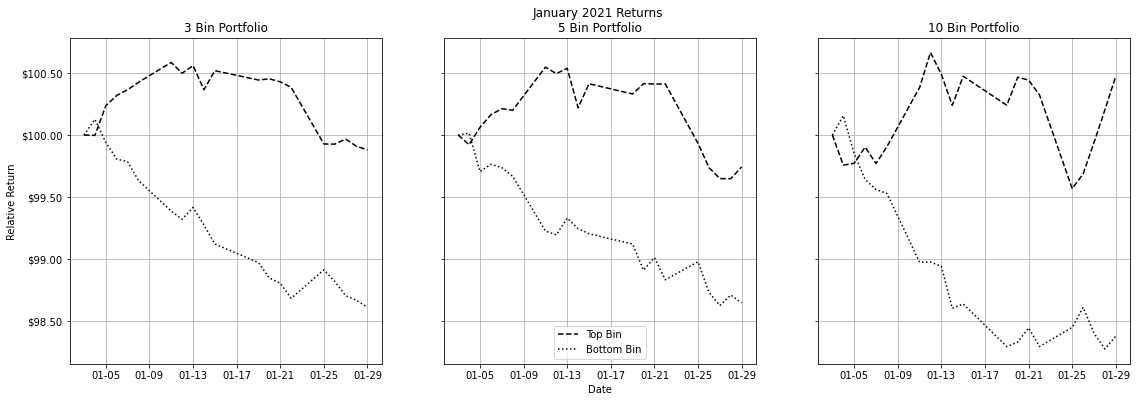

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
f.set_figheight(6)
f.set_figwidth(19)
ax1.plot(date_list,t3,color="black",label="Top Bin", ls="dashed")
ax1.plot(date_list,b3,color="black",label="Bottom Bin", ls="dotted")
ax1.set_title("3 Bin Portfolio")

ax2.plot(date_list,t5,color="black",label="Top Bin", ls="dashed")
ax2.plot(date_list,b5,color="black",label="Bottom Bin", ls="dotted")
ax2.set_title("January 2021 Returns \n5 Bin Portfolio")

ax3.plot(date_list,t10,color="black",label="Top Bin", ls="dashed")
ax3.plot(date_list,b10,color="black",label="Bottom Bin", ls="dotted")
ax3.set_title("10 Bin Portfolio")

ax2.legend(loc="lower center")
ax1.set_ylabel("Relative Return")
ax2.set_xlabel("Date")
# yfmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
# yticks = mtick.FormatStrFormatter(yfmt)
# ax1.yaxis.set_major_formatter(yticks)
ax1.yaxis.set_major_formatter('${x:1.2f}')
xfmt = mdates.DateFormatter('%m-%d')
ax1.xaxis.set_major_formatter(xfmt)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

#### Portfolio Raw

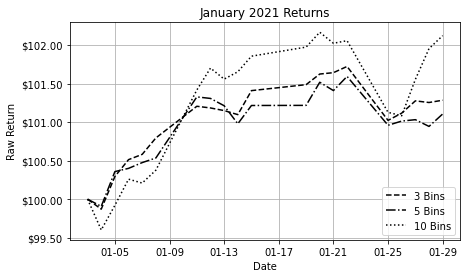

In [11]:
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax.plot(date_list,p3,color="black",label="3 Bins", ls="dashed")
ax.plot(date_list,p5,color="black",label="5 Bins", ls="dashdot")
ax.plot(date_list,p10,color="black",label="10 Bins", ls="dotted")
ax.legend(loc="lower right")
ax.set_ylabel("Raw Return")
ax.set_xlabel("Date")
yfmt = '%.2f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(yfmt)
ax1.yaxis.set_major_formatter(yticks)
ax.yaxis.set_major_formatter('${x:.2f}')
xfmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)
ax.set_title("January 2021 Returns")
plt.grid(True)